In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel("covid_World_updated.xlsx")
df.date=pd.to_datetime(df.date,infer_datetime_format=True)
location_name="USA"
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### Creating Data Frame with Total Cases lags

In [75]:


df.index = pd.DatetimeIndex(df.date)
df_location=df[df['location']==location_name]
#df_State=df_State.reindex(pd.date_range("2020-01-30", "2020-08-23"), fill_value=0)
df_location['date']=df_location.index
df_location.reset_index(inplace = True, drop = True)
df_out={'Date': df_location.date.to_list(),
             'Deaths':df_location.total_deaths.to_list(),
            'ConLag14':df_location.total_cases.shift(14).to_list(),
           }

df_out=pd.DataFrame(df_out)
df_out.columns
df_out=df_out.dropna()
df_out.set_index('Date',inplace=True)
for cols in df_out.columns:
    if cols=="Date":
        continue
    else:
        df_out[cols]=df_out[cols].astype(int)

In [76]:
df_location.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
243,IND,Asia,India,2020-08-30,3542733.0,78761.0,71113.286,63498.0,948.0,970.286,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
244,IND,Asia,India,2020-08-31,3621245.0,78512.0,73556.714,64469.0,971.0,989.571,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
245,IND,Asia,India,2020-09-01,3691166.0,69921.0,74834.714,65228.0,759.0,976.857,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
246,IND,Asia,India,2020-09-02,3769523.0,78357.0,76435.571,66333.0,1105.0,983.429,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
247,IND,Asia,India,2020-09-03,3853406.0,83883.0,77596.000,67376.0,1043.0,986.286,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [77]:
df_out

,Deaths,ConLag14
Date,,
2020-01-14,0,0
2020-01-15,0,0
2020-01-16,0,0
2020-01-17,0,0
2020-01-18,0,0
...,...,...
2020-08-30,63498,2589682
2020-08-31,64469,2647663
2020-09-01,65228,2702742


In [78]:
train=df_out[:]
train


,Deaths,ConLag14
Date,,
2020-01-14,0,0
2020-01-15,0,0
2020-01-16,0,0
2020-01-17,0,0
2020-01-18,0,0
...,...,...
2020-08-30,63498,2589682
2020-08-31,64469,2647663
2020-09-01,65228,2702742


In [79]:
y_train=train.pop('Deaths')
x_train=train

### Model Building using Linear Regression to select the feature

In [80]:
lm=LinearRegression()


In [81]:
import statsmodels.api as sm  
x_train = sm.add_constant(x_train)
x_train

,const,ConLag14
Date,,
2020-01-14,1.0,0
2020-01-15,1.0,0
2020-01-16,1.0,0
2020-01-17,1.0,0
2020-01-18,1.0,0
...,...,...
2020-08-30,1.0,2589682
2020-08-31,1.0,2647663
2020-09-01,1.0,2702742


In [82]:
lm = sm.OLS(y_train, x_train).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     5687.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):          3.47e-164
Time:                        18:05:21   Log-Likelihood:                -2233.8
No. Observations:                 232   AIC:                             4472.
Df Residuals:                     230   BIC:                             4478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2338.6026    279.237      8.375      0.0

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.33
1,ConLag14,1.00


#### We will use ```Confirmed Lag 14```  as the external regressors to forecast death for the next fourteen days because they have low p-value and low vif score.We can use both of them together or individually. 

### Model Forecasting using Prophet for next 14 days
    * using confirmed lag 14


In [84]:
from fbprophet import Prophet

In [87]:
def forecasting(df_out,regressor,table,graph):
    
    df_out1=pd.DataFrame(columns=["ds","y"]) 
    
        
    df_out1['y']=df_out['Deaths']
    df_out1['ds']=df_out.index
    
    if regressor=="Confirmed":
        df_out1['ConLag14']=df_out['ConLag14']
#     elif regressor=="Cured":
#         df_out1['CurLag5']=df_out['CurLag5']
#     else:
#         df_out1['ConLag5']=df_out['ConLag5']
#         df_out1['CurLag5']=df_out['CurLag5']
        
        
    df_out1.reset_index(inplace=True,drop=True)
    
    #print(df_out1)
    
        
    model=Prophet(daily_seasonality=True,yearly_seasonality=False)
    
    if regressor=="Confirmed":
        model.add_regressor('ConLag14')
#     elif regressor=="Cured":
#         model.add_regressor('CurLag5')
#     else:
#         model.add_regressor('ConLag5')
#         model.add_regressor('CurLag5')
        
    #print(df_out)    
    model.fit(df_out1)
    
    future = model.make_future_dataframe(periods=14)
    
    if regressor=="Confirmed":
        conlag=list(df_out1['ConLag14'])
        for i in range(14,0,-1):
            conlag.append(list(df_location['total_cases'])[-i])
        #print(conlag)
            
        future['ConLag14']=list(conlag)
        #print(future.tail(14))
        #print(future)
#     elif regressor=="Cured":
#         curlag=list(df_out1['CurLag5'])
#         #curlag.append(list(df_State['Cured'])[-1])
#         for i in range(5,0,-1):
#             curlag.append(list(df_State['Cured'])[-i])

#         future['CurLag5']=list(curlag)
#     else:
#         conlag=list(df_out1['ConLag5'])
#         for i in range(5,0,-1):
#             conlag.append(list(df_State['Confirmed'])[-i])
#         #conlag.append(list(df_State['Confirmed'])[-1])
#         curlag=list(df_out1['CurLag5'])
#         for i in range(5,0,-1):
#             curlag.append(list(df_State['Cured'])[-i])
#         #curlag.append(list(df_State['Cured'])[-1])
#         future['ConLag5']=list(conlag)
#         future['CurLag5']=list(curlag)
#     #print(future)
    
    forecast=model.predict(future)
    if table=="Yes":
        print("Forecasted Table for number of Deaths for location: "+location_name+"\n")
        Forecast=pd.DataFrame()
        Forecast['Day']=forecast['ds']
        Forecast['Forecasted_Death']=[int(x) for x in list(forecast['yhat'])]
        Forecast['Lower Limit']=[int(x) for x in list(forecast['yhat_lower'])]
        Forecast['Upper Limit']=[int(x) for x in list(forecast['yhat_upper'])]
        Forecast.set_index('Day',inplace=True)
        print(Forecast.tail(14))
    if graph=="Yes":
        print("\nGraphs (Forecasted + Components) for number of Deaths for location: "+location_name)
        model.plot(forecast,xlabel='Date', ylabel='Deaths')
        components_fig=model.plot_components(forecast)
        axes = components_fig.get_axes()
        axes[0].set_ylabel('Trend')
        axes[1].set_ylabel('Weekly')
        axes[2].set_ylabel('Daily')
        axes[3].set_ylabel('Extra_regressors_additive')
        axes[0].set_xlabel('Date')
        axes[1].set_xlabel('Date')
        axes[2].set_xlabel('Date')
        axes[3].set_xlabel('Date')

Forecasted Table for number of Deaths for location: India

            Forecasted_Death  Lower Limit  Upper Limit
Day                                                   
2020-09-04             68531        68387        68670
2020-09-05             69571        69444        69714
2020-09-06             70591        70454        70736
2020-09-07             71556        71409        71712
2020-09-08             72518        72368        72690
2020-09-09             73599        73434        73779
2020-09-10             74694        74503        74902
2020-09-11             75781        75577        76019
2020-09-12             76868        76626        77142
2020-09-13             77954        77677        78277
2020-09-14             79039        78742        79411
2020-09-15             80063        79723        80506
2020-09-16             81223        80797        81706
2020-09-17             82374        81923        82952

Graphs (Forecasted + Components) for number of Deaths for lo

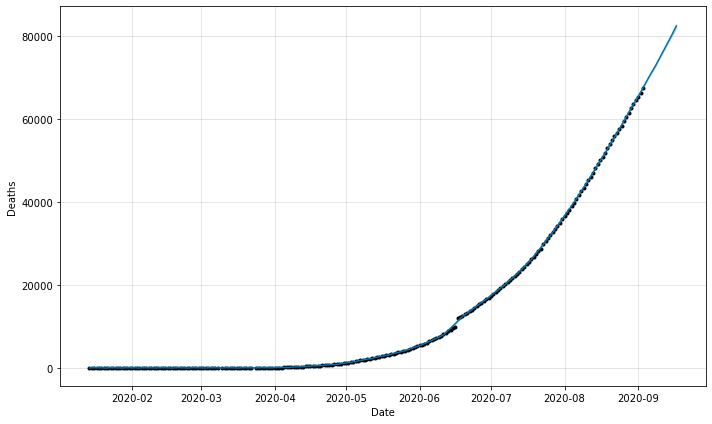

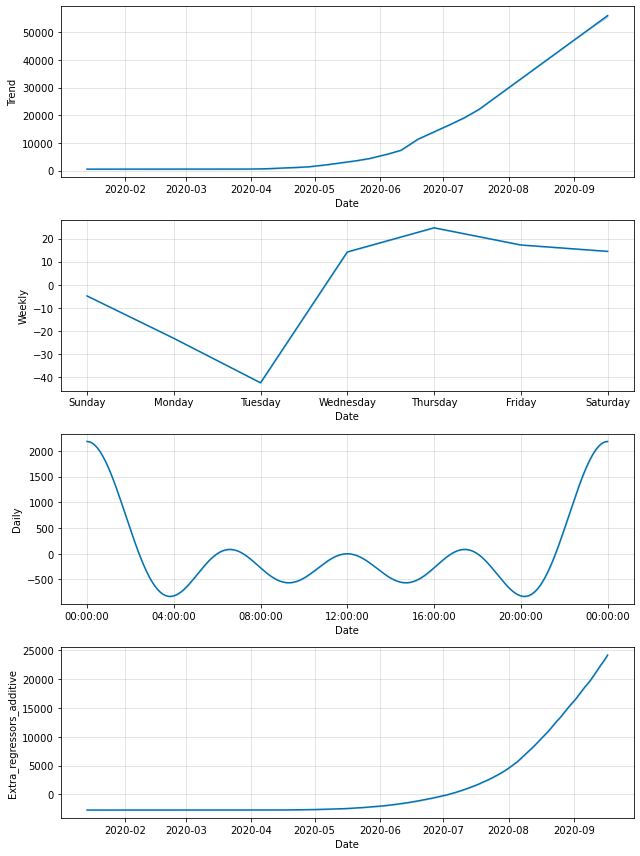

In [88]:
# df=pd.read_csv("prophet_covid.csv")
# #print(df.index)
# df.Date=pd.to_datetime(df.Date,infer_datetime_format=True)

# State_name="Maharashtra"

table="Yes"
graph="Yes"
regressor="Confirmed"
forecasting(df_out,regressor,table,graph)